In [1]:
import numpy as np
import pandas as pd

In [6]:
rng = pd.date_range('2021/08/01', periods=20, freq='')
rng

DatetimeIndex(['2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19',
               '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17',
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [9]:
time = pd.Series(np.random.randn(20),
                index=pd.date_range('2021/08/01', periods=20, freq='B'))
time

2021-08-02    0.540304
2021-08-03    0.776487
2021-08-04   -0.738103
2021-08-05   -1.037077
2021-08-06   -0.312659
2021-08-09    0.211953
2021-08-10    0.552709
2021-08-11    0.623995
2021-08-12   -2.220174
2021-08-13    2.405730
2021-08-16   -1.364763
2021-08-17   -0.937695
2021-08-18    0.677090
2021-08-19   -1.252419
2021-08-20    0.250073
2021-08-23   -1.022761
2021-08-24   -0.577070
2021-08-25   -0.546577
2021-08-26   -1.696602
2021-08-27    0.076139
Freq: B, dtype: float64

In [10]:
time.truncate(before='2021-08-06')

2021-08-06   -0.312659
2021-08-09    0.211953
2021-08-10    0.552709
2021-08-11    0.623995
2021-08-12   -2.220174
2021-08-13    2.405730
2021-08-16   -1.364763
2021-08-17   -0.937695
2021-08-18    0.677090
2021-08-19   -1.252419
2021-08-20    0.250073
2021-08-23   -1.022761
2021-08-24   -0.577070
2021-08-25   -0.546577
2021-08-26   -1.696602
2021-08-27    0.076139
Freq: B, dtype: float64

# 数据重采样
- 降采样（天->月）
- 升采样（月->天）

In [14]:
rng1 = pd.date_range('2021/08/01', periods=90, freq='D')
ts = pd.Series(np.random.randn(len(rng1)), index = rng1)
ts.head()

2021-08-01    1.262227
2021-08-02    1.510184
2021-08-03    0.639360
2021-08-04    1.999528
2021-08-05   -0.072094
Freq: D, dtype: float64

In [15]:
ts.tail()

2021-10-25   -1.740070
2021-10-26    0.706163
2021-10-27   -0.114681
2021-10-28   -0.018757
2021-10-29    0.360140
Freq: D, dtype: float64

In [24]:
mTs = ts.resample('M').mean() # 降采样将天转化为月

In [25]:
ts

2021-08-01    1.262227
2021-08-02    1.510184
2021-08-03    0.639360
2021-08-04    1.999528
2021-08-05   -0.072094
                ...   
2021-10-25   -1.740070
2021-10-26    0.706163
2021-10-27   -0.114681
2021-10-28   -0.018757
2021-10-29    0.360140
Freq: D, Length: 90, dtype: float64

In [33]:
rmTs = mTs.resample('D').asfreq()
rmTs

2021-08-31    0.005440
2021-09-01         NaN
2021-09-02         NaN
2021-09-03         NaN
2021-09-04         NaN
                ...   
2021-10-27         NaN
2021-10-28         NaN
2021-10-29         NaN
2021-10-30         NaN
2021-10-31   -0.056503
Freq: D, Length: 62, dtype: float64

# 插值方法
- ffill 空值取前面的值
- bfill 空值取后面的值
- interpolate 线性取值

In [40]:
mTs.resample('D').ffill(10)

2021-08-31    0.005440
2021-09-01    0.005440
2021-09-02         NaN
2021-09-03         NaN
2021-09-04         NaN
                ...   
2021-10-27         NaN
2021-10-28         NaN
2021-10-29         NaN
2021-10-30         NaN
2021-10-31   -0.056503
Freq: D, Length: 62, dtype: float64

In [41]:
mTs.resample('D').bfill(10)

2021-08-31    0.005440
2021-09-01         NaN
2021-09-02         NaN
2021-09-03         NaN
2021-09-04         NaN
                ...   
2021-10-27   -0.056503
2021-10-28   -0.056503
2021-10-29   -0.056503
2021-10-30   -0.056503
2021-10-31   -0.056503
Freq: D, Length: 62, dtype: float64

In [42]:
mTs.resample('D').interpolate()

2021-08-31    0.005440
2021-09-01   -0.005251
2021-09-02   -0.015943
2021-09-03   -0.026635
2021-09-04   -0.037326
                ...   
2021-10-27   -0.089897
2021-10-28   -0.081549
2021-10-29   -0.073200
2021-10-30   -0.064852
2021-10-31   -0.056503
Freq: D, Length: 62, dtype: float64

# 滑动窗口

In [43]:
%matplotlib inline
import matplotlib.pylab

In [44]:
df = pd.Series(np.random.randn(600), index = pd.date_range('2021/8/1', freq='D', periods=600))
df.head()

2021-08-01    0.860232
2021-08-02    0.536203
2021-08-03    0.059041
2021-08-04    0.291770
2021-08-05    0.967856
Freq: D, dtype: float64

In [45]:
r = df.rolling(window = 10)
r

Rolling [window=10,center=False,axis=0]

In [49]:
# r.max, r.median, r.std, r.skew, r.sum, r.var
print(r.median())

2021-08-01         NaN
2021-08-02         NaN
2021-08-03         NaN
2021-08-04         NaN
2021-08-05         NaN
                ...   
2023-03-19    0.024092
2023-03-20    0.024092
2023-03-21    0.024092
2023-03-22   -0.106484
2023-03-23   -0.106484
Freq: D, Length: 600, dtype: float64


<AxesSubplot:>

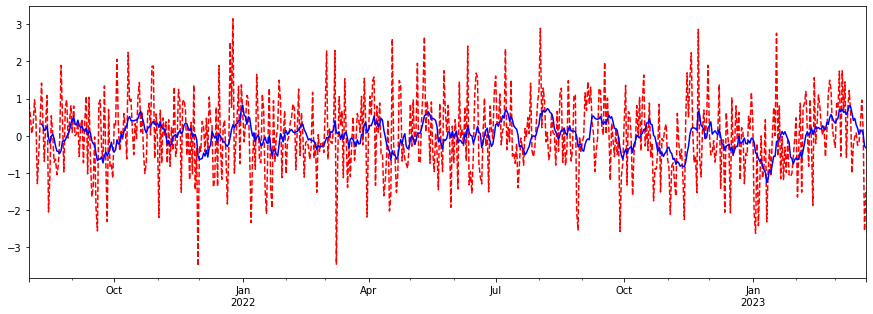

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

df.plot(style='r--') # 红色虚线
df.rolling(window=10).mean().plot(style='b')

In [53]:
matplotlib.matplotlib_fname()

'D:\\softwares\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'